In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('data_encoded/encoded_heart_attack_risk_dataset.csv')
data.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,67,208,72,0,0,1,0,0,4.168189,0,...,286,0,6,0,158,88,True,True,False,False
1,21,389,98,1,1,1,1,1,1.813242,1,...,235,1,7,0,165,93,True,False,False,True
2,21,324,72,1,0,0,0,0,2.078353,1,...,587,4,4,0,174,99,False,False,True,False
3,84,383,73,1,1,1,0,1,9.828130,1,...,378,3,4,0,163,100,True,True,False,False
4,66,318,93,1,1,1,1,0,5.804299,1,...,231,1,5,0,91,88,True,False,False,True


### Shuffle the data

In [38]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head(5)

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,63,261,87,1,1,1,1,1,14.634382,1,...,240,3,6,1,147,69,True,False,False,True
1,73,291,65,1,0,1,0,0,18.299826,1,...,229,1,8,0,172,73,True,False,True,False
2,82,130,70,0,1,1,0,0,12.579844,1,...,558,1,5,0,161,83,False,True,False,False
3,70,202,68,1,1,1,1,0,8.667550,1,...,291,3,6,1,135,76,True,False,True,False
4,49,156,65,1,0,1,0,0,19.695883,1,...,491,0,8,0,142,67,True,False,True,False


### Scale the numerical features

In [39]:
# Separate target feature
X = data.drop('Heart Attack Risk', axis=1)
y = data['Heart Attack Risk']

# Identify the numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_numerical = X[numerical_features]

# Scale numerical features
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_numerical)

# Replace numerical columns in X with their scaled version
X_scaled = X.copy()
X_scaled[numerical_features] = X_scaled_numerical

In [40]:
X_scaled.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic Pressure,Diastolic Pressure,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,0.437307,0.013886,0.582893,0.730113,1.014136,0.339157,0.997151,0.819762,0.798853,1.008365,...,-0.383588,-0.794139,-0.214528,-0.514750,0.452563,-1.100873,True,False,False,True
1,0.907933,0.384904,-0.487678,0.730113,-0.986061,0.339157,-1.002857,-1.219867,1.432638,1.008365,...,1.666134,-0.843305,-1.090738,0.491104,1.401384,-0.828314,True,False,True,False
2,1.331496,-1.606225,-0.244367,-1.369651,1.014136,0.339157,-1.002857,-1.219867,0.443606,1.008365,...,1.354619,0.627183,-1.090738,-1.017677,0.983903,-0.146917,False,True,False,False
3,0.766745,-0.715782,-0.341691,0.730113,1.014136,0.339157,0.997151,-1.219867,-0.232861,1.008365,...,-0.187778,-0.566191,-0.214528,-0.514750,-0.002871,-0.623895,True,False,True,False
4,-0.221570,-1.284676,-0.487678,0.730113,-0.986061,0.339157,-1.002857,-1.219867,1.674028,1.008365,...,0.210182,0.327722,-1.528843,0.491104,0.262799,-1.237152,True,False,True,False


### Split the Data

In [66]:
X = X_scaled  
y = data['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [67]:
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 7010
Test size: 1753


### Hyperparameter tuning using GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 0.5, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)


Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
Best F1 Score: 0.4691388972031622


### Train the SVM Model

In [69]:
svm_model = SVC(kernel='rbf', C=0.1, gamma=0.1, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

,C,0.1
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [74]:
# Make Predictions
y_pred = svm_model.predict(X_test)

### Evaluate the Model

In [75]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5265259555048488


In [76]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Confusion Matrix: [[677 448]
 [382 246]]


In [77]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.64      0.60      0.62      1125
           1       0.35      0.39      0.37       628

    accuracy                           0.53      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.53      0.53      1753



### Confusion Matrix and Model Metrics Plot

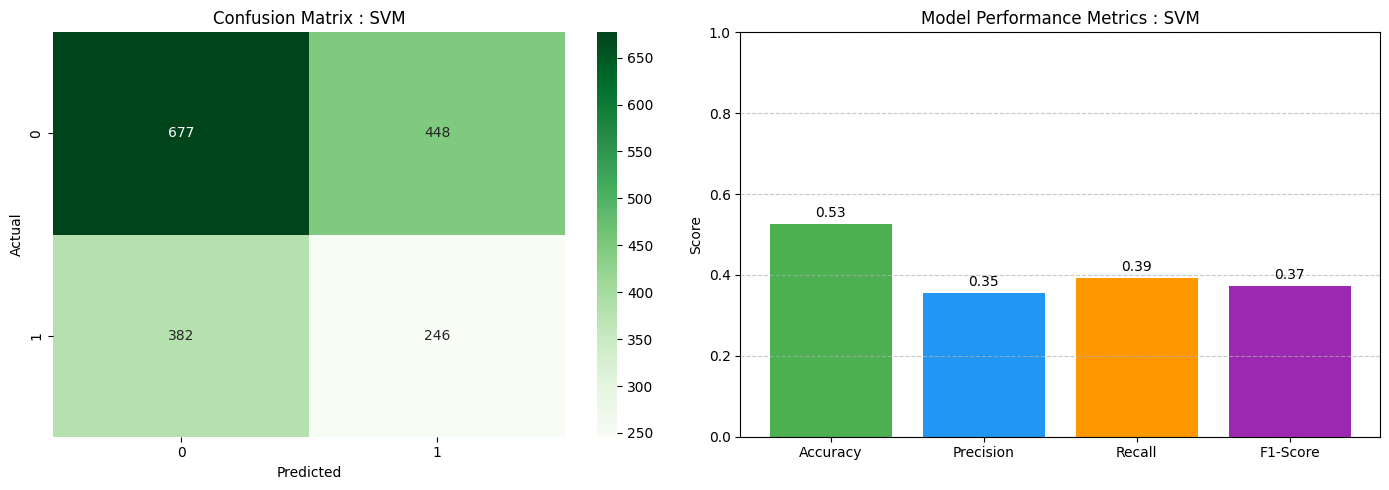

In [84]:
cm = confusion_matrix(y_test, y_pred)

report = classification_report(y_test, y_pred, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1 = report['1']['f1-score']
accuracy = accuracy_score(y_test, y_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=[0, 1], yticklabels=[0, 1], ax=axes[0])
axes[0].set_title("Confusion Matrix : SVM")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

bars = axes[1].bar(metrics, values, color=['#4caf50', '#2196f3', '#ff9800', '#9c27b0'])

for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

axes[1].set_ylim(0, 1)
axes[1].set_title('Model Performance Metrics : SVM')
axes[1].set_ylabel('Score')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()